# Extreme Gradient Boosting con XGBoost

[Mayor informacion](https://xgboost.readthedocs.io/en/latest/)


XGBoost o eXtreme Gradient Boosting pertenece a la familia de árboles impulsados y sigue los mismos principios de gradient boosting machine (GBM). Las diferencias clave incluyen:

- Regularizar para prevenir el overfit, dando resultados preciso.
- Una matrix sparse, la cual es mucho mas eficiente para aumentar velocidad de procesamiento.

![](https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/61047iF5F5072316647A42/image-size/large?v=1.0&px=999)

XGBoost es una librería optimizada con base en la tecnica de gradiente diseñada para ser altamente **eficiente**, **flexible** y **portátil**. Implementa algoritmos de aprendizaje automático en el marco de Gradient Boosting. XGBoost proporciona un aumento de árbol paralelo (también conocido como GBDT, GBM) que resuelve muchos problemas de ciencia de datos de una manera rápida y precisa. El mismo código se ejecuta en los principales entornos distribuidos (Hadoop, SGE, MPI) y puede resolver problemas más allá de miles de millones de ejemplos.

Mas acerca de XGBoost:

- Originalmente escrito en C++
- Existen diferentes APIs en distintos lenguajes:
  - Python
  - R
  - Scala
  - Julia
  - Java
- Los Features pueden ser numericos o categoricos
- Numerical features deben ser convertidos con la funcion Z
- Categorical features deben ser en formato one-hot encoding

Para instalar:
```shell
pip install xgboost
```

Empezando con XGBoost:
```python
import xgboost as xgb
# Leer la data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# Especificar los parametros
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# realizar la prediccion
preds = bst.predict(dtest)
```

## Para recordar:

**Elementos de Supervised Learning**
- Modelo y Parametros
  - El **modelo** en supervised learning se refiere a la estructura matematica en la cual la prediccion$y_i$ se realiza con base en el input $x_i$. Por ejemplo en el *modelo lineal*, la prediccion esta dada por $\hat{y_i} = \sum_j{\theta_jx_{ij}}$, como una combinacion lineal de los features multiplicados por unos pesos
  - Los **parametros** son la parte no determinada que dependen de como aprenda el algoritmo. En los problemas de regresion, los parametros son los coeficientes $\theta$.
- Funcion objetivo: Training Loss + Regularization
  - La tarea del **training** tiene en cuenta las cantidades para encontrar los mejores parametros $\theta$ que mejor ajuste tienen en la training data $x_i$ y labels $y_i$.  Para entrenar el modelo se necesita definir la **objective function** para medir que tan bien el modelo se ajusta a la training data. $$obj(\theta)=L(\theta) + \Omega(\theta)$$
  Donde $L$ es la training loss function, y $\Omega$ es el termino de regularization. La training loss mide que tan *predictivo* es nuestor modelo respecto a la training data. Una practica usual para la eleccion de $L$ es el *mean squared error*, el cual esta dado por $$L(\theta)=\sum{(y_i-\hat{y_i})^2}$$
  El **regularization term** es lo que las personas usualmente olvidan adicionar. El regularization term controla la complejidad del modelo, lo cual nos permite evitar el overfitting. Analizemos esto con una figura. Se te pide que ajustes visualmente una funcion escalonada dado el iput dado en la parte superior izquierda de la imagen. Cual crees que seria la mejor solucion que mejor se ajusta?
  ![](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/step_fit.png)
  La respuesta correcta se muestra en rojo. El principio general es que queremos que la solucion sea *simple* y de alto poder *predictivo*.


## Configurando XGBoost

- **Definir el problema & evaluacion**:
  - *Objetivo / Learning Task*
    * Linear regression (reg:linear)
    * Logistic regression for binary classification (binary:logistic)
    * Softmax for multi-class classification (multi:softprob)
  - *Metricas de evaluacion*:
    - AUC - Area under curve (used in classification)
    - RMSE - Root mean square error (used in regression)
    - merror - Exact matching error, (used in multi-class classification)
- **Parametros para controlar el over fitting**:
  - *Learning rate or eta*  [default=0.3][range:(0-1)]
    * Hace el modelo mas robusto disminuyendo los pesos en cada paso
    * Valor bajo de eta hace que tome mayor tiempo computacionalmente, a mayor valor de eta se previene del over-fitting pero un resultado menos preciso
    * Si el tiempo lo permite y tu ideal es que el performance dle modelo sea bueno, reduce el valor de eta e incrementa el nro rounds
    * Valores optimos estan entre 0.01 - 0.3
  - *Max_depth* [default=6][range:(0,Inf)]
    * Controla la profundidad del arbol
    * Mayor depth, mas complejo es el modelo; mayores chances de overfit .
    * No hay un valor estandar para max_depth. Datasets mas grandes requieren de mayor profundidad para aprender las reglas dentro de la data.
- **Parametros para velocidad**
  - *No of rounds/tree*: [default=10][range:(1,Inf)]
    * Controla el maximo numero de iteraciones
    * Para clasificacion, es similar al numero de arboles 
  - *Sub-sample* [default=1][range:(0,1)]
    * Controla el numero de muestras (observaciones) dadas en cada arbol.
    * Tipicamente, se encuentra entre (0.5-0.8)
  - *Early Stopping*:
    * Si es NULL, la early stopping function no se usa.
    * Si se ajusta a un entero k, training con validation set se detendra si el performance no mejora luego de k rondas.

Ejemplo:
```python
xgb_model = xgboost.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(10, 100), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=2, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)
```

Mayor informacion:
- [Oficial page](https://xgboost.readthedocs.io/en/latest/parameter.html)
- [XGBoost in Alteryx](https://www.abiqos.com/2019/08/expand-your-predictive-palette-xgboost-in-alteryx/)
- [Complete Guide to Parameter Tuning in XGBoost with codes in Python](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

# Rossmann Store Sales

Pronosticar las ventas utilizando datos de tiendas, promociones y competidores

**Objetivo**: explorar datos y predecir 6 semanas de ventas diarias para 1115 tiendas ubicadas en toda Alemania

[Kaggle Competition](https://www.kaggle.com/c/rossmann-store-sales/overview)

**Prerequisitos**:

[Forecasting at scale - fbprophet](https://facebook.github.io/prophet/)
```
conda install -c conda-forge fbprophet xgboost
```

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
#!pip install fbprophet 

In [1]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basico + fechas 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# estadistica
from statsmodels.distributions.empirical_distribution import ECDF

# analisis de series de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
#from fbprophet import Prophet

# machine learning: XGB
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost.sklearn import XGBRegressor # wrapper

In [2]:
# importar la train data
train = pd.read_csv("Data/train.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')

# informacion adicional de ventas
store = pd.read_csv("Data/store.csv", 
                    low_memory = False)
# time series como indexes
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

## Exploratory Data Analysis

En esta primera sección, revisamos el tren y almacenamos datos, manejamos los valores faltantes y creamos nuevas características para un análisis más detallado.

In [4]:
# head and tail
print("In total: ", train.shape)
train.head(5).append(train.tail(5))

In total:  (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1
2013-01-01,1114,2,0,0,0,0,a,1


Breve descripcion:

- Sales: Ventas en cualquier dia(target variable).
- Customers: numero de compradores en un dia dado
- Open: Un indicador de si la tienda estuvo abierta o no 0 = closed, 1 = open.
- Promo: Indicador si la tiendo tuvo promociones en el dia
- StateHoliday: indica a state holiday. Normalmente la mayoria de tiendas en holiday estan cerradas
- SchoolHoliday: indica si la (Store, Date) es afectada por el cierre de escuela publica

Estamos tratando con datos de series de tiempo, por lo que probablemente nos sirva para extraer fechas para un análisis más detallado. También tenemos dos variables probables correlacionadas en el conjunto de datos, que se pueden combinar en una nueva función.

In [3]:
# extraccion de data
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

# adicionar una nueva variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [5]:
train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1,1,NaN


En promedio, los clientes gastan alrededor de 9,50 $ al día. Aunque hay días con Ventas iguales a cero.

## ECDF: empirical cumulative distribution function

Para obtener la primera impresión sobre las variables continuas en los datos, podemos graficar ECDF.

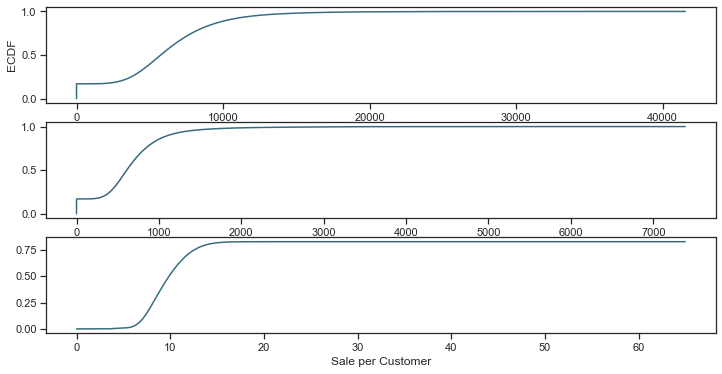

In [6]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

Aproximadamente el 20% de los datos tiene una cantidad cero de ventas/clientes con los que debemos tratar y casi el 80% del tiempo, la cantidad diaria de ventas fue menor a 1000. Entonces, ¿qué pasa con las ventas cero? ¿Se debe solo al hecho de que la tienda está ¿cerrado?

## Missing values

**Closed stores and zero sales stores**

In [7]:
# closed stores
print("In total: ", train[(train.Open == 0) & (train.Sales == 0)].shape[0])
train[(train.Open == 0) & (train.Sales == 0)].head()

In total:  172817


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


Hay 172817 tiendas cerradas en los datos. Es aproximadamente el 10% de la cantidad total de observaciones. Para evitar pronósticos sesgados, eliminaremos estos valores.
¿Qué pasa con las tiendas abiertas con cero ventas?

In [8]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 13)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,20,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,13,NaN
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,39,NaN


Curiosamente, hay tiendas abiertas sin **ventas en días laborables**. Solo hay 54 días en los datos, por lo que podemos suponer que hubo factores externos involucrados, por ejemplo, manifestaciones.

In [9]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 13)


Que tal acerca de store information:

In [10]:
# additional information about the stores
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- Store: Un id  unico para cada tienda
- StoreType: diferencia entre 4 modelos de tienda diferentes: a, b, c, d
- Assortment:describe un nivel de surtido: a = basic, b = extra, c = extended
- CompetitionDistance: distancia en metros hasta la tienda competidora más cercana
- CompetitionOpenSince[Month/Year]: da el año y el mes aproximados en que se abrió el competidor más cercano
- Promo2: Promo2 es una promoción continua para algunas tiendas: 0 = la tienda no participa, 1 = la tienda participa
- Promo2Since[Year/Week]: describe el año y la semana calendario en que la tienda comenzó a participar en Promo2
- PromoInterval: describe los intervalos consecutivos en que se inicia Promo2, nombrando los meses en que se inicia la promoción. P.ej. "Febrero, mayo, agosto, noviembre" significa que cada ronda comienza en febrero, mayo, agosto, noviembre de cualquier año para esa tienda.

In [11]:
# missing values?
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Tenemos pocas variables con valores perdidos con las que debemos lidiar. Empecemos por la distancia de competición.

In [12]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Aparentemente, esta información simplemente falta en los datos. No se observó ningún patrón en particular. En este caso, tiene mucho sentido reemplazar NaN con los valores de la mediana (que es dos veces menor que el promedio).

In [13]:
# fill NaN with a median value (skewed distribuion)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

Continuando con los datos faltantes. ¿Qué pasa con Promo Since Week? ¿Será que observamos puntos de datos inusuales?

In [14]:
# no promo = no information about the promo?
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

No, si no hay Promo2, no hay información al respecto. Podemos reemplazar estos valores por ceros. Lo mismo ocurre con las variables deducidas de la competencia, CompetitionOpenSinceMonth y CompetitionOpenSinceYear.

In [15]:
# replace NA's by 0
store.fillna(0, inplace = True)

In [16]:
print("Joining train set with an additional store information.")


train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## Store types
En esta sección veremos de cerca los diferentes niveles de StoreType y cómo se distribuye la métrica principal Sales entre ellos.

In [17]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


StoreType B tiene el promedio de ventas más alto entre todos los demás, sin embargo, tenemos muchos menos datos para él. Así que imprimamos una suma general de Ventas y Clientes para ver qué StoreType es el más vendido y concurrido:

In [18]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Claramente, las tiendas de tipo A. StoreType D ocupa el segundo lugar tanto en Ventas como en Clientes. ¿Qué pasa con los períodos de fechas? La cuadrícula de facetas de Seaborn es la mejor herramienta para esta tarea:

## Regression XGBoost

[XGBoost](https://github.com/dmlc/xgboost/blob/master/doc/model.md) es la implementacion deGradient Boosted Decision trees diseñado para mejor velocidad y performance. Su nombre completo es [regularized Gradient Boosting](http://datascience.la/xgboost-workshop-and-meetup-talk-with-tianqi-chen/), debido a que usa un modelo regularizadopara controlar el over-fitting.

Ventajas adicionales del algoritmo:
- Manejo automatizado de valores perdidos: XGB usa un "learned" con una especificacion para missing values. "Learned" implica aprender en la construccion del arbol mediante el proceso de elegir la mejor direccion que optimiza el training loss.
- Análisis de características interactivo (aún implementado solo en R): traza la estructura de los árboles de decisión con divisiones y hojas.
- Análisis de importancia de características: un diagrama de barras ordenado de las variables más significativas.

<div class = "alert alert-block alert-info"> Como ya vimos en la sección anterior, nuestros datos son altamente estacionales y no aleatorios (dependientes). Por lo tanto, antes de ajustar cualquier modelo, necesitamos "suavizar" las ventas de la variable objetivo. El paso de preprocesamiento típico consiste en registrar la transformación de los datos en cuestión. Una vez que realicemos las proyecciones, elimainaremos las transformaciones logarítmicas en orden inverso </div>

## Quick Run through

In [18]:
# to predict to
test = pd.read_csv("Data/test.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')
test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


La variable Id representa un dúplex (Store, Date) dentro del conjunto de prueba.

In [19]:
# test: missing values?
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [20]:
test[pd.isnull(test.Open)]

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,480,622,4,NaN,1,0,0
2015-09-16,1336,622,3,NaN,1,0,0
2015-09-15,2192,622,2,NaN,1,0,0
2015-09-14,3048,622,1,NaN,1,0,0
2015-09-12,4760,622,6,NaN,0,0,0
2015-09-11,5616,622,5,NaN,0,0,0
2015-09-10,6472,622,4,NaN,0,0,0
2015-09-09,7328,622,3,NaN,0,0,0
2015-09-08,8184,622,2,NaN,0,0,0


Vemos que estas tiendas deberían estar abiertas normalmente. Supongamos que lo son entonces.

In [21]:
# replace NA's in Open variable by 1 
test.fillna(1, inplace = True)

### Data Encoding

XGBoost no admite nada más que números. Entonces, antes de modelar, necesitamos codificar ciertas variables de factores en fechas numéricas más extraídas como lo hicimos antes para el conjunto train.

In [22]:
# data extraction
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear

# to numerical
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
test.StateHoliday.replace(mappings, inplace = True)

train_store.Assortment.replace(mappings, inplace = True)
train_store.StoreType.replace(mappings, inplace = True)
train_store.StateHoliday.replace(mappings, inplace = True)
train_store.drop('PromoInterval', axis = 1, inplace = True)

store.StoreType.replace(mappings, inplace = True)
store.Assortment.replace(mappings, inplace = True)
store.drop('PromoInterval', axis = 1, inplace = True)

Volviendo a los datos de train_store:

In [23]:
# take a look on the train and store again
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,0,1,2015,7,...,31,9.482883,3,1,1270.0,9.0,2008.0,0,0.0,0.0
1,1,4,5020,546,1,1,0,1,2015,7,...,31,9.194139,3,1,1270.0,9.0,2008.0,0,0.0,0.0
2,1,3,4782,523,1,1,0,1,2015,7,...,31,9.143403,3,1,1270.0,9.0,2008.0,0,0.0,0.0
3,1,2,5011,560,1,1,0,1,2015,7,...,31,8.948214,3,1,1270.0,9.0,2008.0,0,0.0,0.0
4,1,1,6102,612,1,1,0,1,2015,7,...,31,9.970588,3,1,1270.0,9.0,2008.0,0,0.0,0.0


Combinemos datos de prueba y almacenamiento también:

In [24]:
print("Joining test set with an additional store information.")
test_store = pd.merge(test, store, how = 'inner', on = 'Store')

test_store['CompetitionOpen'] = 12 * (test_store.Year - test_store.CompetitionOpenSinceYear) + (test_store.Month - test_store.CompetitionOpenSinceMonth)
test_store['PromoOpen'] = 12 * (test_store.Year - test_store.Promo2SinceYear) + (test_store.WeekOfYear - test_store.Promo2SinceWeek) / 4.0

print("In total: ", test_store.shape)
test_store.head()

Joining test set with an additional store information.
In total:  (41088, 21)


,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpen,PromoOpen
0,1,1,4,1.0,1,0,0,2015,9,17,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
1,857,1,3,1.0,1,0,0,2015,9,16,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
2,1713,1,2,1.0,1,0,0,2015,9,15,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
3,2569,1,1,1.0,1,0,0,2015,9,14,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.50
4,3425,1,7,0.0,0,0,0,2015,9,13,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,84.0,24189.25


### Model Training

**Metodologia**

1. Dividir la data en train y test para evaluar el modelo.
2. Determinar eta con valores aproximadamente (e.g. 0.05 ~ 0.1), num_round entre 300 ~ 500
3. Usar grid search para encontrar la mejor combinacion de parametros adicionales
4. Menor valor de eta permite alcanzar el valor optimo
5. Usar el set de validation y seleccionar el model con los mejores parameteros.

In [25]:
# split into training and evaluation sets
# excluding Sales and Id columns
predictors = [x for x in train_store.columns if x not in ['Customers', 'Sales', 'SalePerCustomer']]
y = np.log(train_store.Sales) # log transformation of Sales
X = train_store

# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% for the evaluation set
                                                    random_state = 42)

In [26]:
predictors

['Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [27]:
y

0         8.568456
1         8.521185
2         8.472614
3         8.519391
4         8.716372
            ...   
844333    9.136801
844334    7.918629
844335    8.343316
844336    8.429454
844337    8.532279
Name: Sales, Length: 844338, dtype: float64

In [29]:
X

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,0,1,2015,7,...,31,9.482883,3,1,1270.0,9.0,2008.0,0,0.0,0.0
1,1,4,5020,546,1,1,0,1,2015,7,...,31,9.194139,3,1,1270.0,9.0,2008.0,0,0.0,0.0
2,1,3,4782,523,1,1,0,1,2015,7,...,31,9.143403,3,1,1270.0,9.0,2008.0,0,0.0,0.0
3,1,2,5011,560,1,1,0,1,2015,7,...,31,8.948214,3,1,1270.0,9.0,2008.0,0,0.0,0.0
4,1,1,6102,612,1,1,0,1,2015,7,...,31,9.970588,3,1,1270.0,9.0,2008.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,9291,1002,1,1,0,0,2013,1,...,2,9.272455,1,1,1100.0,6.0,2009.0,0,0.0,0.0
844334,292,6,2748,340,1,0,0,0,2013,1,...,1,8.082353,1,1,1100.0,6.0,2009.0,0,0.0,0.0
844335,292,5,4202,560,1,0,0,1,2013,1,...,1,7.503571,1,1,1100.0,6.0,2009.0,0,0.0,0.0
844336,292,4,4580,662,1,0,0,1,2013,1,...,1,6.918429,1,1,1100.0,6.0,2009.0,0,0.0,0.0


In [34]:
# predictors
X.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear'],
      dtype='object')

In [28]:
# evaluation metric: rmspe
# Root Mean Square Percentage Error
# code chunk shared at Kaggle
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

**Tuning Parameters** 

- eta: Tamaño de paso usado para ir actualizando los pesos . Menor valor indica mas lentitud pero mejor convergencia
- num_round: Total de iteracionesq
- subsample: El ratio de training data usado en cada iteracion in each iteration; combate el overfitting. Debe ser configurado en el rango de 30% a 80% del training dataset, y comparado con el valor de 100% para no sampling.
- colsample_bytree: El ratio de features usados en cada iteracion, default 1.
- max_depth: Maxima profundidad del arbol. Si no se define el valor maximo de max depth, gradient boosting eventualmente llegara al overfit.
- early_stopping_rounds: Si no hay un aumento en la puntuación de validación para un número determinado de iteraciones, el algoritmo se detendrá antes de tiempo y también combatirá el sobreajuste.


In [29]:
# base parameters
params = {
    'booster': 'gbtree', 
    'objective': 'reg:squarederror', # regression task
    'subsample': 0.8, # 80% of data to grow trees and prevent overfitting
    'colsample_bytree': 0.85, # 85% of features used
    'eta': 0.1, 
    'max_depth': 10, 
    'seed': 42} # for reproducible results

In [30]:
# XGB with xgboost library
dtrain = xgb.DMatrix(X_train[predictors], y_train)
dtest = xgb.DMatrix(X_test[predictors], y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(params, dtrain, 100, evals = watchlist,
                      early_stopping_rounds = 50, feval = rmspe_xg, verbose_eval = True)

[0]	train-rmse:7.44339	train-rmspe:0.99953	test-rmse:7.44309	test-rmspe:0.99953
[1]	train-rmse:6.70077	train-rmspe:0.99882	test-rmse:6.70048	test-rmspe:0.99882
[2]	train-rmse:6.03254	train-rmspe:0.99755	test-rmse:6.03223	test-rmspe:0.99755
[3]	train-rmse:5.43133	train-rmspe:0.99541	test-rmse:5.43100	test-rmspe:0.99541
[4]	train-rmse:4.89021	train-rmspe:0.99203	test-rmse:4.88984	test-rmspe:0.99203
[5]	train-rmse:4.40344	train-rmspe:0.98695	test-rmse:4.40310	test-rmspe:0.98696
[6]	train-rmse:3.96558	train-rmspe:0.97974	test-rmse:3.96523	test-rmspe:0.97975
[7]	train-rmse:3.57177	train-rmspe:0.96994	test-rmse:3.57138	test-rmspe:0.96995
[8]	train-rmse:3.21740	train-rmspe:0.95717	test-rmse:3.21704	test-rmspe:0.95717
[9]	train-rmse:2.89869	train-rmspe:0.94115	test-rmse:2.89835	test-rmspe:0.94114
[10]	train-rmse:2.61202	train-rmspe:0.92175	test-rmse:2.61165	test-rmspe:0.92172
[11]	train-rmse:2.35419	train-rmspe:0.89894	test-rmse:2.35379	test-rmspe:0.89886
[12]	train-rmse:2.12273	train-rmspe:0.

Esencialmente, queremos el menor valor. El modelo con hiperparámetros base da mejores resultados en train, lo que indica el problema de sobreajuste.

### Grid Search from sklearn

Scikit learn wrapper is famoso por GridSearchCV y RandomizedSearchCV. Entre estos dos, la mayoria dle tiempo la preferencia es utilizar RandomnizedSearchCV, la version rapida de GridSearchCV.

Como input, RandomnizedSearchCV toma el wrapper del XGboost, así que en lugar de usar la primera versión de un modelo, construimos el modelo análogo en sklearn con XGBRegressor.

In [33]:
# XGB with sklearn wrapper
# the same parameters as for xgboost model
params_sk = {'max_depth': 10, 
            'n_estimators': 100, # the same as num_rounds in xgboost
            'objective': 'reg:squarederror', 
            'subsample': 0.8, 
            'colsample_bytree': 0.85, 
            'learning_rate': 0.1, 
            'seed': 42}     

skrg = XGBRegressor(**params_sk)

skrg.fit(X_train, y_train,eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-rmse:7.44181	validation_1-rmse:7.44151
[1]	validation_0-rmse:6.69766	validation_1-rmse:6.69739
[2]	validation_0-rmse:6.02792	validation_1-rmse:6.02770
[3]	validation_0-rmse:5.42516	validation_1-rmse:5.42497
[4]	validation_0-rmse:4.88268	validation_1-rmse:4.88250
[5]	validation_0-rmse:4.39450	validation_1-rmse:4.39428
[6]	validation_0-rmse:3.95505	validation_1-rmse:3.95488
[7]	validation_0-rmse:3.55955	validation_1-rmse:3.55942
[8]	validation_0-rmse:3.20362	validation_1-rmse:3.20350
[9]	validation_0-rmse:2.88329	validation_1-rmse:2.88317
[10]	validation_0-rmse:2.59497	validation_1-rmse:2.59488
[11]	validation_0-rmse:2.33551	validation_1-rmse:2.33540
[12]	validation_0-rmse:2.10197	validation_1-rmse:2.10188
[13]	validation_0-rmse:1.89178	validation_1-rmse:1.89170
[14]	validation_0-rmse:1.70262	validation_1-rmse:1.70254
[15]	validation_0-rmse:1.53237	validation_1-rmse:1.53230
[16]	validation_0-rmse:1.37914	validation_1-rmse:1.37908
[17]	validation_0-rmse:1.24124	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
results = skrg.evals_result()
results

{'validation_0': OrderedDict([('rmse',
               [7.441813,
                6.697661,
                6.027925,
                5.425156,
                4.882681,
                4.394503,
                3.955047,
                3.559554,
                3.203615,
                2.883288,
                2.594975,
                2.335507,
                2.101975,
                1.891781,
                1.702617,
                1.532369,
                1.379143,
                1.241242,
                1.117123,
                1.005418,
                0.904883,
                0.81442,
                0.732984,
                0.659692,
                0.593728,
                0.534362,
                0.480931,
                0.432843,
                0.389572,
                0.35062,
                0.315562,
                0.284011,
                0.255615,
                0.230058,
                0.207058,
                0.186357,
                0.167726,
 

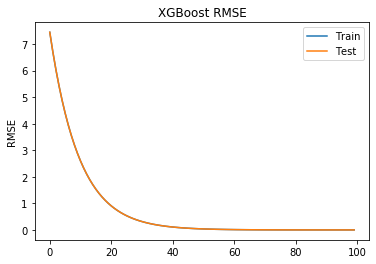

In [35]:
# retrieve performance metrics
results = skrg.evals_result()
epochs = len(results['validation_0']['rmse'])
epochs = len(results['validation_1']['rmse'])
x_axis = range(0, epochs)
# plot AUC
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

Para parametros especificaremos el parametro de regularizacion reg_alpha que reduce la complejidad del modelo e incrementa el performance, de igual manera el parametro gamma que representa la minima reduccion de loss requerida para hacer el split y el  max_depth es usado para controlar el over-fitting.

In [36]:
# import scipy.stats as st
params_grid = {  
    'learning_rate': [0.04,0.05,0.06,0.07,0.1],
    'max_depth': [10,11,12,13,14,16],
    'gamma': [0.8,1],
    'reg_alpha': [22,23]
}

search_sk = RandomizedSearchCV(skrg, params_grid, cv = 5) # 5 fold cross validation
search_sk.fit(X_train, y_train)

# best parameters
print(search_sk.best_params_); print(search_sk.best_score_)

{'reg_alpha': 23, 'max_depth': 13, 'learning_rate': 0.1, 'gamma': 0.8}
0.9993292594128913


In [36]:
# with new parameters
params_new = {
    'booster': 'gbtree', 
    'objective': 'reg:squarederror', 
    'subsample': 0.8, 
    'colsample_bytree': 0.85, 
    'eta': 0.05, 
    'max_depth': 16, 
    'gamma': 0.8,
    'reg_alpha': 22,
    'seed': 42} 

model_final = xgb.train(params_new, dtrain, 100, evals = watchlist,
                        early_stopping_rounds = 50, feval = rmspe_xg, verbose_eval = True)

[0]	train-rmse:7.85609	train-rmspe:0.99974	test-rmse:7.85577	test-rmspe:0.99974
[1]	train-rmse:7.46424	train-rmspe:0.99954	test-rmse:7.46390	test-rmspe:0.99954
[2]	train-rmse:7.09202	train-rmspe:0.99925	test-rmse:7.09167	test-rmspe:0.99925
[3]	train-rmse:6.73855	train-rmspe:0.99887	test-rmse:6.73819	test-rmspe:0.99887
[4]	train-rmse:6.40266	train-rmspe:0.99835	test-rmse:6.40229	test-rmspe:0.99835
[5]	train-rmse:6.08366	train-rmspe:0.99766	test-rmse:6.08329	test-rmspe:0.99766
[6]	train-rmse:5.78074	train-rmspe:0.99677	test-rmse:5.78037	test-rmspe:0.99677
[7]	train-rmse:5.49303	train-rmspe:0.99564	test-rmse:5.49265	test-rmspe:0.99565
[8]	train-rmse:5.21965	train-rmspe:0.99422	test-rmse:5.21927	test-rmspe:0.99423
[9]	train-rmse:4.96000	train-rmspe:0.99247	test-rmse:4.95963	test-rmspe:0.99247
[10]	train-rmse:4.71341	train-rmspe:0.99032	test-rmse:4.71301	test-rmspe:0.99032
[11]	train-rmse:4.47923	train-rmspe:0.98773	test-rmse:4.47882	test-rmspe:0.98773
[12]	train-rmse:4.25682	train-rmspe:0.

In [37]:
yhat = model_final.predict(xgb.DMatrix(X_test[predictors]))
error = rmspe(X_test.Sales.values, np.exp(yhat))

print('First validation yelds RMSPE: {:.6f}'.format(error))

First validation yelds RMSPE: 0.214233


### Entendimiento del modelo

Las puntuaciones de importancia de las características nos ayudan a ver qué variables contribuyeron más a la puntuación.

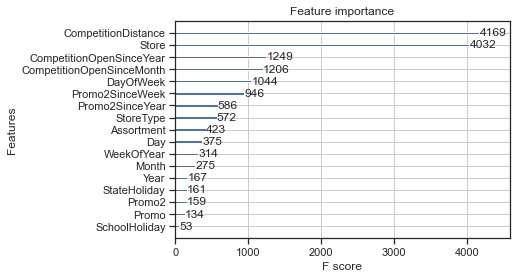

In [38]:
xgb.plot_importance(model_final)

Variables Store and CompetitionDistance are both leading. Then go features CompetitionOpenSinceMonth,  CompetitionOpenSinceYear, DayOfWeek, PromoSinceWeek and deducted features PromoOpen.

### Prediccion

In [39]:
# predictions to unseen data
unseen = xgb.DMatrix(test_store[predictors])
test_p = model_final.predict(unseen)

forecasts = pd.DataFrame({'Id': test['Id'], 
                          'Sales': np.exp(test_p)})
# forecasts
forecasts.head()

,Id,Sales
Date,,
2015-09-17,1,4563.012695
2015-09-17,2,4578.106934
2015-09-17,3,4915.607910
2015-09-17,4,5639.245117
2015-09-17,5,4044.463867


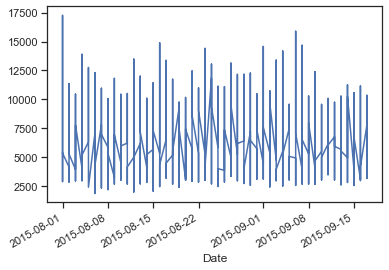

In [40]:
forecasts['Sales'].plot()

Respecto al XGboost model, recientemente Microsoft lanzo [open sourced LightGBM](https://github.com/Microsoft/LightGBM/tree/master/examples/python-guide), una libreria potencialmente sería superior que XGboost.